In [1]:
import pandas as pd
import numpy as np
import requests 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# gathering the Data
# 1.Twitter Archive File — WeRateDogs
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# 2. The tweet image predictions

import requests
import os

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
df_2  = pd.read_csv('image_predictions.tsv', sep='\t')
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
# 3. the Twitter API for each tweet's JSON data

# importing Tweepy api and other essentials
import tweepy 

consumer_key = 'yDhu5nxl3lc4XJvHoTxZmueJM' 
consumer_secret = '1o1F9wiF04ZDl8qUDSik7JKcMNKkkdA89ya6n4TQmY9CvrMnWu'
access_token = '1357139687329079296-YGQKcF1vsgjsHFwFmzjH3t9dciTsSx'
access_secret = 'Zah0PUj4sh6G4SqMutxuqypHX3zlCrVUVwxd9u6r0bg2U'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
api.me()

User(_api=<tweepy.api.API object at 0x7f9ef8f51100>, _json={'id': 1357139687329079296, 'id_str': '1357139687329079296', 'name': 'ina', 'screen_name': 'ina49330995', 'location': '', 'profile_location': None, 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 0, 'listed_count': 0, 'created_at': 'Thu Feb 04 01:31:44 +0000 2021', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png'

In [6]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [7]:
count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [8]:
df_3 = pd.read_json('tweet_json.txt', lines = True)
df_3.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 4. read the json file 
# so as to fetch only required columns in dataframe where you are facing the error

In [9]:
df_3 = pd.DataFrame(columns = ['tweet_id','retweet_count','favorite_count'])

In [10]:
with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_3 = df_3.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                       columns = ['tweet_id','retweet_count','favorite_count']))

In [11]:
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7390,35072
0,892177421306343426,5507,30369
0,891815181378084864,3638,22835
0,891689557279858688,7560,38326
0,891327558926688256,8152,36602


In [12]:
df_3 = df_3.reset_index(drop = True)

In [13]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   object
 2   favorite_count  2331 non-null   object
dtypes: object(3)
memory usage: 54.8+ KB


# assessing data


## Quality
### df_1
1. erroneous datatypes : `timestamp` column
2. little bit weird name(not personally) in `name`column, which involved 'not','old','the','by','his','this', etc <br/>
3. unnecessary column in the df_1, such as `in_reply_to_status_id`, `in_reply_to_user_id`, `source`, `retweeted_status_id / user_id / timestamp`
4. 0 value in `rating_numerator`<br/>
5. change the column name `floofer` to `floof`<br/>
6. some dog stage variables have none <br/>
7. `tweet_id` should be string

### df_2
8. column `p1`,`p2`,`p3` have some upper case and the lowercase letters at the same time<br/>


## Tidiness

1. df_1, df_2, df_3 should be merged into one table<br/>
2. 4 types of dog stage should be one 'dog_stage' column

In [14]:
# df_1 columns datatype
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# erroneous name counts
df_1['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Tiger        1
BeBe         1
Cedrick      1
Apollo       1
Tayzie       1
Name: name, Length: 957, dtype: int64

In [16]:
# a, the, old, by, this etc..
df_1['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
# 2 of them have 0 value
df_1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
# df_1 columns name
df_1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [19]:
# some of them have two types of dog at the same time

len(df_1[(df_1['doggo'] != 'None') & (df_1['floofer'] != 'None')])

1

In [20]:
df_1[(df_1['doggo'] != 'None') & (df_1['floofer'] != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [21]:
len(df_1[(df_1['doggo'] != 'None') & (df_1['pupper'] != 'None')])

12

In [22]:
df_1[(df_1['doggo'] != 'None') & (df_1['pupper'] != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [23]:
len(df_1[(df_1['doggo'] != 'None') & (df_1['puppo'] != 'None')])

1

In [24]:
df_1[(df_1['doggo'] != 'None') & (df_1['puppo'] != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [25]:
len(df_1[(df_1['floofer'] != 'None') & (df_1['pupper'] != 'None')])

0

In [26]:
len(df_1[(df_1['floofer'] != 'None') & (df_1['puppo'] != 'None')])

0

In [27]:
len(df_1[(df_1['pupper'] != 'None') & (df_1['puppo'] != 'None')])

0

In [28]:
# df_1 rating_denominator

df_1['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [29]:
# df_1 p1, p2, p3
df_2[['p1','p2','p3']]

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English_springer,German_short-haired_pointer
2071,paper_towel,Labrador_retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


# Cleaning Data

In [30]:
# Before cleaning your data copy the original version using .copy()

df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

## Quality

## 1. erroneous datatypes

## Define
- `timestamp` has wrong datatype.

## Code

In [32]:
df_1_clean.timestamp = pd.to_datetime(df_1_clean.timestamp)

## Test

In [35]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## 2. Weird `name`

## Define
- `name` have some erroneous type of name.

## Code

In [36]:
idx_not = df_1_clean[df_1_clean['name'] == 'not'].index
df_1_clean = df_1_clean.drop(idx_not)

In [37]:
idx_old = df_1_clean[df_1_clean['name'] == 'old'].index
df_1_clean = df_1_clean.drop(idx_old)

In [38]:
idx_the = df_1_clean[df_1_clean['name'] == 'the'].index
df_1_clean = df_1_clean.drop(idx_the)

In [39]:
idx_by = df_1_clean[df_1_clean['name'] == 'by'].index
df_1_clean = df_1_clean.drop(idx_by)

In [40]:
idx_his = df_1_clean[df_1_clean['name'] == 'his'].index
df_1_clean = df_1_clean.drop(idx_his)

In [41]:
idx_this = df_1_clean[df_1_clean['name'] == 'this'].index
df_1_clean = df_1_clean.drop(idx_this)

In [42]:
idx_a = df_1_clean[df_1_clean['name'] == 'a'].index
df_1_clean = df_1_clean.drop(idx_a)

In [43]:
idx_an = df_1_clean[df_1_clean['name'] == 'an'].index
df_1_clean = df_1_clean.drop(idx_an)

## Test

In [46]:
df_1_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles',
       'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance',
       'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti',
       'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter',
       'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean',
       'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey',
       'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili',
       'Sammy', 'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn

## 3. unnecessary columns

## Define
- There are some columns that we're not going to use to analyze the data.

## Code

In [47]:
df_1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id' ,'retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id'], axis = 1, inplace = True)

## Test

In [49]:
df_1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

## 4. 0 value in `rating_numerator`

## Define
- 2 variables have 0 value in `rating_numerator`

## Code

In [50]:
idx_rating = df_1_clean.query('rating_numerator == 0').index
idx_rating

df_1_clean = df_1_clean.drop(idx_rating)

## Test

In [51]:
df_1_clean.query('rating_numerator == 0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## 5. Typo of column name

## Define
- Based on Dogtionary, we should change `floofer` to `floof`.

## Code

In [52]:
df_1_clean.rename(columns = {"floofer" : "floof"}, inplace = True)

## Test

In [54]:
df_1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 6. Handle the None value

## Define
- Each of the `doggo`, `floof`, `pupper`, `puppo` has None value.

## Code

In [55]:
df_1_clean.doggo.replace('None', '', inplace=True)
df_1_clean.floof.replace('None', '', inplace=True)
df_1_clean.pupper.replace('None', '', inplace=True)
df_1_clean.puppo.replace('None', '', inplace=True)

## Test

In [64]:
df_1_clean[['doggo','floof','pupper','puppo']].head()

,doggo,floof,pupper,puppo
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,


## 7. tweet_id data type

## Define
- tweet_id data type is integer. It'd be better to convert into string.

## Code

In [57]:
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].astype('str')

In [58]:
df_2_clean['tweet_id'] = df_2_clean['tweet_id'].astype('str')

In [59]:
df_3_clean['tweet_id'] = df_3_clean['tweet_id'].astype('str')

## Test

In [60]:
df_1_clean.info(), df_2_clean.info(), df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2278 non-null   object             
 1   timestamp           2278 non-null   datetime64[ns, UTC]
 2   source              2278 non-null   object             
 3   text                2278 non-null   object             
 4   expanded_urls       2219 non-null   object             
 5   rating_numerator    2278 non-null   int64              
 6   rating_denominator  2278 non-null   int64              
 7   name                2278 non-null   object             
 8   doggo               2278 non-null   object             
 9   floof               2278 non-null   object             
 10  pupper              2278 non-null   object             
 11  puppo               2278 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

(None, None, None)

## 8. lower/upper case letter

## Define
- Each of the columns `p1`, `p2`, `p3` have different type of letter at once

## Code

In [61]:
df_2_clean['p1'] = df_2_clean['p1'].str.lower()
df_2_clean['p2'] = df_2_clean['p2'].str.lower()
df_2_clean['p3'] = df_2_clean['p3'].str.lower()

## Test

In [63]:
df_2_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman


# Cleaning Data

## 1. separate dog stage

## Define
- `doggo`, `floof`, `pupper`, `puppo` should be merged into `dog_stage`

## Code

In [65]:
df_1_clean['dog_stage'] = df_1_clean.doggo + df_1_clean.floof + df_1_clean.pupper + df_1_clean.puppo

## Test

In [66]:
df_1_clean['dog_stage'].value_counts()

                1905
pupper           239
doggo             82
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [67]:
df_1_clean.loc[df_1_clean.dog_stage == '', 'dog_stage'] = np.nan

## 3. Separate table

## Define
- All of three tables should be merged into one table for easy analyze.

## Code

In [69]:
merge_df = pd.merge(df_1_clean, df_3_clean, on = 'tweet_id', how = 'inner')

In [70]:
master_df = pd.merge(merge_df, df_2_clean, on = 'tweet_id', how = 'inner')

## Test

In [71]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1984 non-null   object             
 1   timestamp           1984 non-null   datetime64[ns, UTC]
 2   source              1984 non-null   object             
 3   text                1984 non-null   object             
 4   expanded_urls       1984 non-null   object             
 5   rating_numerator    1984 non-null   int64              
 6   rating_denominator  1984 non-null   int64              
 7   name                1984 non-null   object             
 8   doggo               1984 non-null   object             
 9   floof               1984 non-null   object             
 10  pupper              1984 non-null   object             
 11  puppo               1984 non-null   object             
 12  dog_stage           311 non-null  

# Storing Data

In [72]:
master_df.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

# Analyzing Data

In [73]:
data = pd.read_csv('twitter_archive_master.csv')
data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [74]:
# What is the most popular dog breeds?

import seaborn as sb

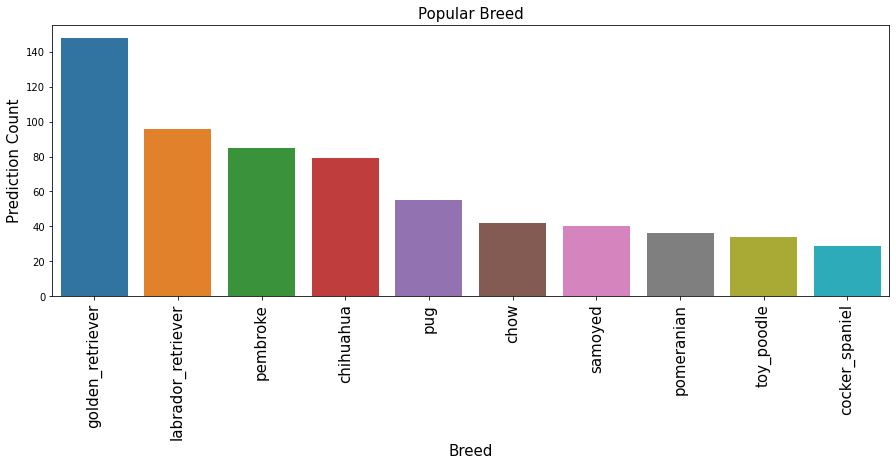

In [75]:
plt.figure(figsize = (15, 5))
plot = sb.barplot(x = data['p1'].value_counts()[0:10].index, y = data['p1'].value_counts()[0:10], data = data);
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90, fontsize = 15);
plt.xlabel("Breed", fontsize = 15);
plt.ylabel("Prediction Count", fontsize = 15);
plt.title("Popular Breed", fontsize = 15);

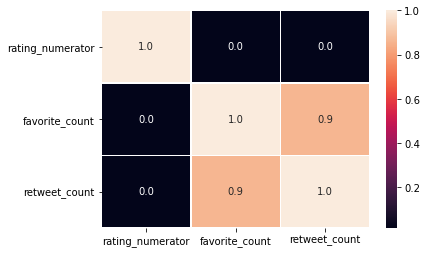

In [76]:
# correlation between Retweet Count, Favorite Count and Ratings

sb.heatmap(data[['rating_numerator', 'favorite_count', 'retweet_count']].corr(), annot = True, linewidths = .5, fmt = '.1f')

Text(0.5, 1.0, 'linear relationship between Favorite Counts and Retweet Counts')

<Figure size 576x576 with 0 Axes>

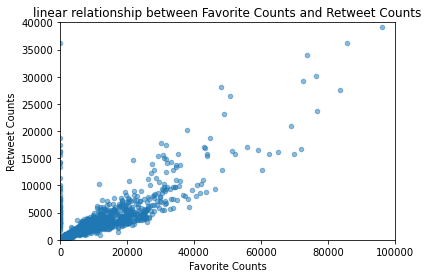

In [77]:
# scatter plot

plt.figure(figsize = (8,8))
data.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5)

plt.xlim((0,100000))
plt.ylim((0,40000))
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Counts')
plt.title('linear relationship between Favorite Counts and Retweet Counts')

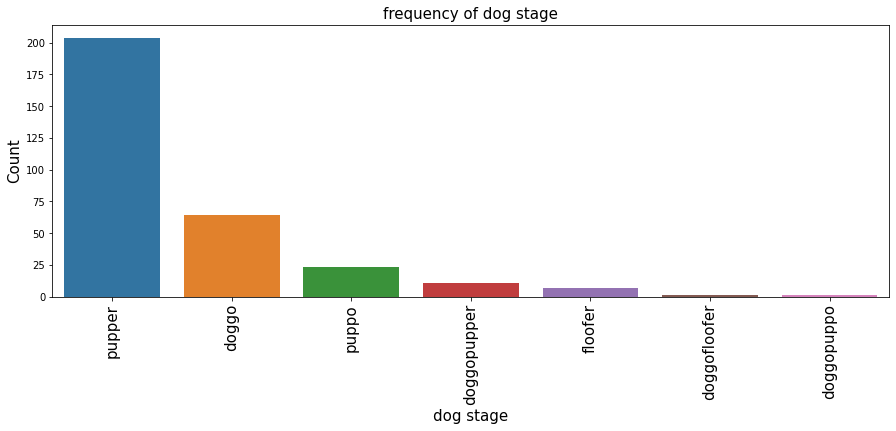

In [78]:
# What is the most dog stage have appeared?

plt.figure(figsize = (15, 5))
dog_stage = sb.barplot(x = data['dog_stage'].value_counts().index, y = data['dog_stage'].value_counts(), data = data);
dog_stage.set_xticklabels(dog_stage.get_xticklabels(), rotation = 90, fontsize = 15);

plt.xlabel("dog stage", fontsize = 15);
plt.ylabel("Count", fontsize = 15);
plt.title("frequency of dog stage", fontsize = 15);

In [79]:
# where did you rate the dog?

def new_source(string):
    result = re.sub('<.*?>','',string)
    return result
data['source']=data['source'].apply(lambda x : new_source(x))

In [80]:
data['source'].value_counts()

Twitter for iPhone    1948
Twitter Web Client      27
TweetDeck                9
Name: source, dtype: int64